In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/perrin-freres-monthly-champagne.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.columns=['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.head(20)

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
5,1964-06-01,3036.0
6,1964-07-01,2282.0
7,1964-08-01,2212.0
8,1964-09-01,2922.0
9,1964-10-01,4301.0


In [15]:
df.describe()

,Month,Sales
count,105,105.000000
mean,1968-05-01 10:30:51.428571432,4761.152381
min,1964-01-01 00:00:00,1413.000000
25%,1966-03-01 00:00:00,3113.000000
50%,1968-05-01 00:00:00,4217.000000
75%,1970-07-01 00:00:00,5221.000000
max,1972-09-01 00:00:00,13916.000000
std,NaN,2553.502601


In [16]:
df.isnull().sum()

,0
Month,0
Sales,0


<Axes: >

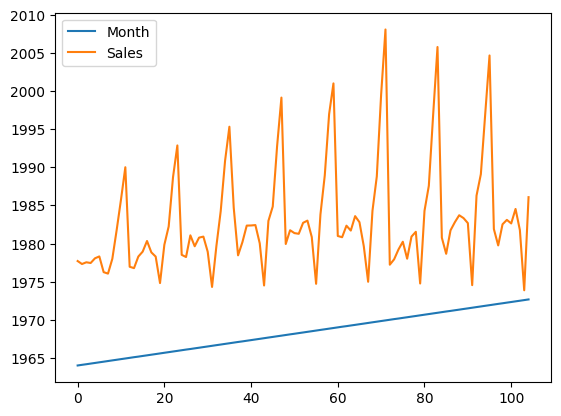

In [17]:
df.plot()

In [18]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller


In [19]:
test_result = adfuller(df['Sales'])


In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [21]:
adfuller_test(df['Sales'])


ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [22]:
df['Sales First Difference'] = df['Sales']-df['Sales'].shift(1)

In [24]:
df['Sales'].shift(1)

,Sales
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
100,4788.0
101,4618.0
102,5312.0
103,4298.0


In [25]:
df.head(20)

,Month,Sales,Sales First Difference
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,-143.0
2,1964-03-01,2755.0,83.0
3,1964-04-01,2721.0,-34.0
4,1964-05-01,2946.0,225.0
5,1964-06-01,3036.0,90.0
6,1964-07-01,2282.0,-754.0
7,1964-08-01,2212.0,-70.0
8,1964-09-01,2922.0,710.0
9,1964-10-01,4301.0,1379.0


In [26]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [27]:
df.head(20)

,Month,Sales,Sales First Difference,Seasonal First Difference
0,1964-01-01,2815.0,NaN,NaN
1,1964-02-01,2672.0,-143.0,NaN
2,1964-03-01,2755.0,83.0,NaN
3,1964-04-01,2721.0,-34.0,NaN
4,1964-05-01,2946.0,225.0,NaN
5,1964-06-01,3036.0,90.0,NaN
6,1964-07-01,2282.0,-754.0,NaN
7,1964-08-01,2212.0,-70.0,NaN
8,1964-09-01,2922.0,710.0,NaN
9,1964-10-01,4301.0,1379.0,NaN


In [28]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

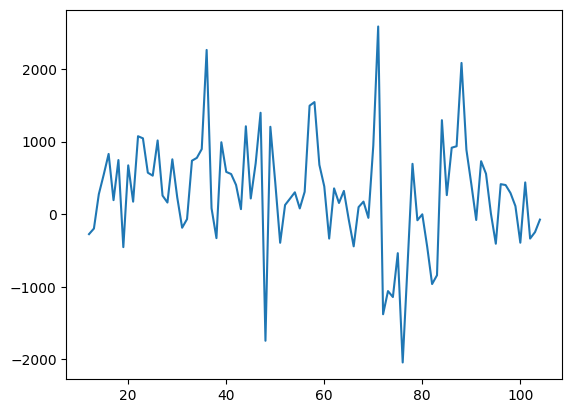

In [29]:
df['Seasonal First Difference'].plot()

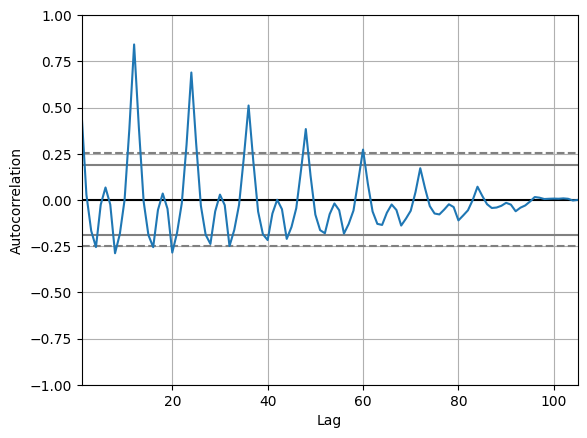

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [33]:
from statsmodels.tsa.arima.model import ARIMA


In [34]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 06 May 2025   AIC                           1911.627
Time:                        06:36:06   BIC                           1919.560
Sample:                             0   HQIC                          1914.841
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.000      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.319      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

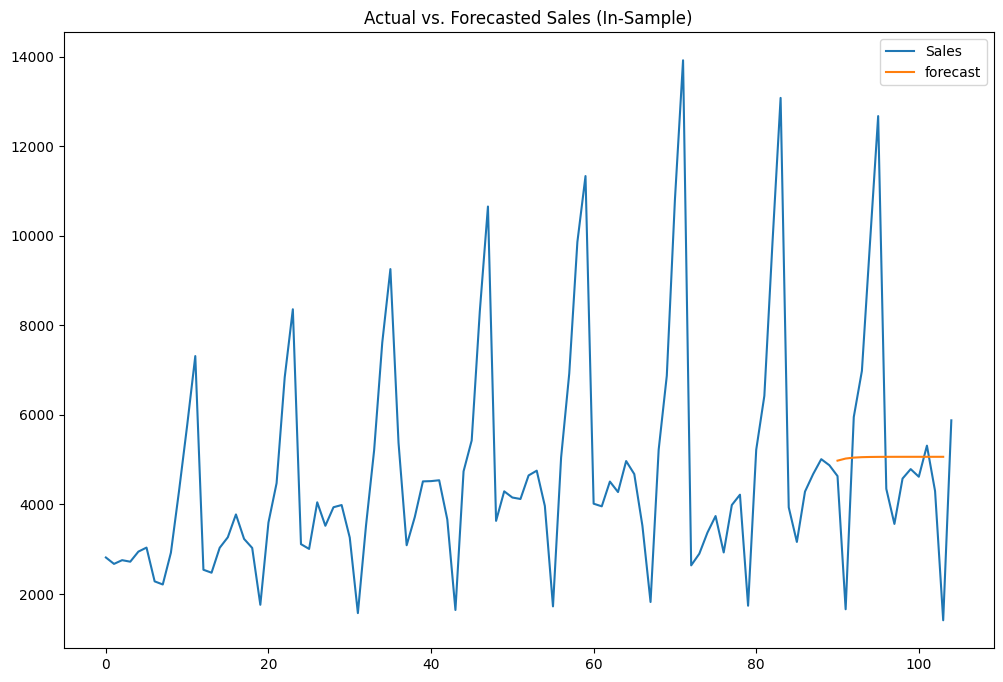

In [36]:
# Predict values for existing data (indices 90 to 103)
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)

# Plot actual vs. forecasted sales
df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.title('Actual vs. Forecasted Sales (In-Sample)')
plt.show()

In [38]:
import statsmodels.api as sm

In [39]:
# Define and fit SARIMA model (order=(p,d,q), seasonal_order=(P,D,Q,s))
model = sm.tsa.statespace.SARIMAX(
    df['Sales'],
    order=(1, 1, 1),               # Non-seasonal parameters (AR=1, I=1, MA=1)
    seasonal_order=(1, 1, 1, 12)    # Seasonal parameters (seasonal AR=1, seasonal I=1, seasonal MA=1, seasonality=12)
)
results = model.fit()  # Fit the model

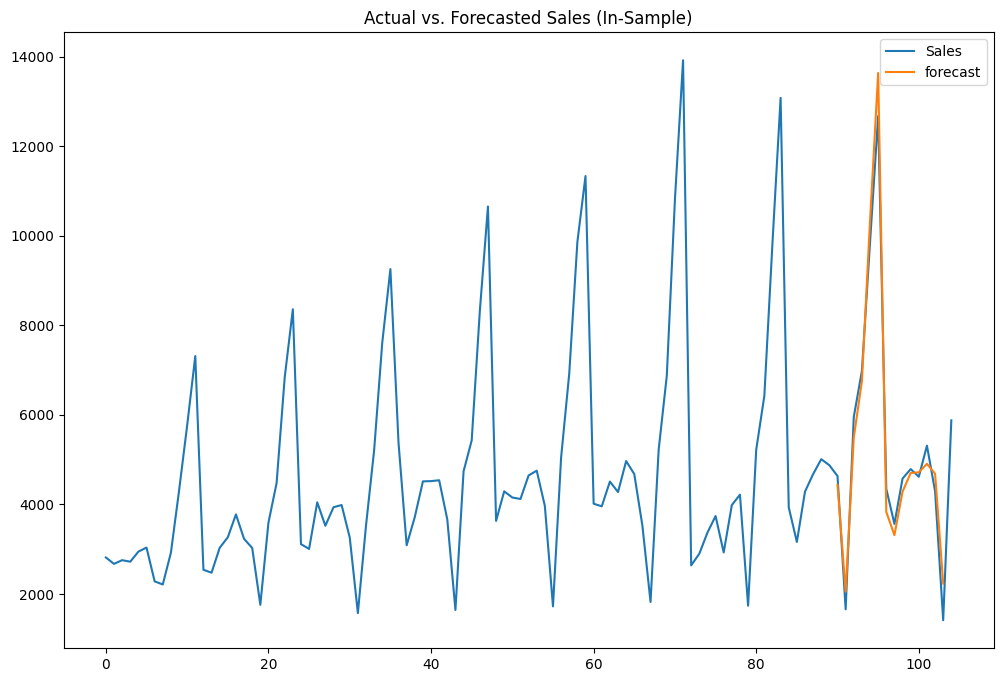

In [40]:
# Predict values for existing data (indices 90 to 103)
df['forecast'] = results.predict(start=90, end=103, dynamic=True)

# Plot actual vs. forecasted sales
df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.title('Actual vs. Forecasted Sales (In-Sample)')
plt.show()